**Segmentation and Targeting (25 points): **

---

*Importation of essential libraries and the greater_boston.csv file into the working environment*






In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
greater_boston = pd.read_csv("greater_boston.csv")

*Using the head() function to gain a bit of understanding of the dataset.*

In [49]:
greater_boston.head()

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1,1.0,own,3309,82050.03,1,South Shore,3189.11,3083.41,1.0,Yes
1,2,1.0,own,3814,83077.81,2,MetroWest,4175.35,4713.28,1.0,Yes
2,3,2.0,rent,2592,91401.41,2,North Shore,1814.98,3479.07,2.0,No
3,4,1.0,own,2628,73048.55,1,Middlesex,1945.14,3842.42,1.0,No
4,5,1.0,rent,2442,89145.36,2,Suffolk,4410.86,1913.28,1.0,Yes


Simple Visualizations to obtain a graphical interpretation of the dataset.

Visualizing the distribution of the "entertainment_spend_est" variable indicates that the estimate of the household's annual spending on entertainment is normally distributed. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


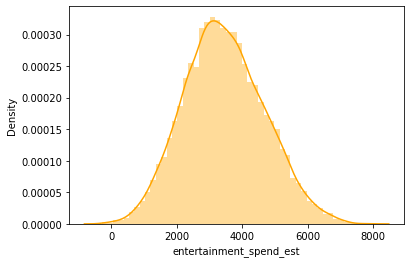

In [50]:
sns.distplot(greater_boston['entertainment_spend_est'], kde = True, color = "orange")

Visualizing the distribution of the "travel_spend_est" variable indicates that the estimate of the household's annual spending on travel is normally distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


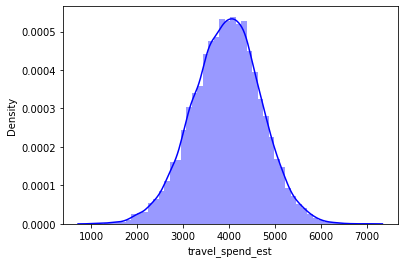

In [51]:
sns.distplot(greater_boston['travel_spend_est'], kde = True, color = "blue")


Visualizing the distribution of the "household_income" variable indicates that the estimate of the total annual income for the household is normally distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


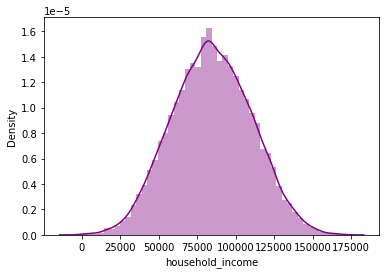

In [52]:
sns.distplot(greater_boston['household_income'], kde = True, color = "purple")

Visualizing the frequency of the "own_rent" variable indicates that majority of the occupants of the home are the actual owners of the home. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


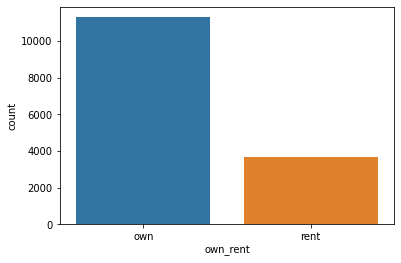

In [53]:
sns.countplot(greater_boston["own_rent"])


Visualizing the frequency of the "number_pets" variable indicates most homes are likely to have 1 or 2 pets which seems normal. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


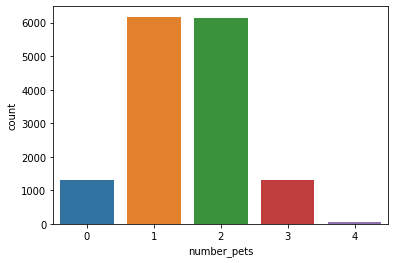

In [54]:
sns.countplot(greater_boston["number_pets"])

Visualizing the frequency of the "LL_passholder" variable indicates most individuals in the households are not current Lobster Land season passholder.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


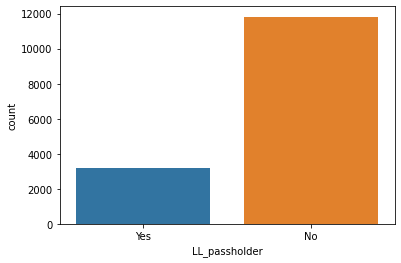

In [55]:
sns.countplot(greater_boston["LL_passholder"])

*Deleting the variable "householdID" because it is a random but unique integer* *assigned to households for easy identification purposes and it carries no *significance in value. The "householdID" would not be relevant in the *italicized text* *clustering model because it would influence the Euclidean *distance in an unfair manner. *italicized text*

*For instance the current householdID 300, could have been householdID 900 hence* *calculating the Euclidean distance using the householdID would be* *misleading or misinforming. It could also render the entire clustering model* *not feasible enough for recommendation purposes.* 

In [56]:
del greater_boston["householdID"]

*Calling the head() function to confirm if the "householdID" was successfully* *deleted. *

In [57]:
greater_boston.head()

,total_ppl,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1.0,own,3309,82050.03,1,South Shore,3189.11,3083.41,1.0,Yes
1,1.0,own,3814,83077.81,2,MetroWest,4175.35,4713.28,1.0,Yes
2,2.0,rent,2592,91401.41,2,North Shore,1814.98,3479.07,2.0,No
3,1.0,own,2628,73048.55,1,Middlesex,1945.14,3842.42,1.0,No
4,1.0,rent,2442,89145.36,2,Suffolk,4410.86,1913.28,1.0,Yes


*Using the .columns attribute to view the current columns in the dataset*

In [58]:
greater_boston.columns

Index(['total_ppl', 'own_rent', 'square_foot', 'household_income',
       'number_pets', 'region', 'entertainment_spend_est', 'travel_spend_est',
       'under_12', 'LL_passholder'],
      dtype='object')

Convert catgorical variable "own_rent" to numeric

In [59]:
greater_boston.head()

,total_ppl,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1.0,own,3309,82050.03,1,South Shore,3189.11,3083.41,1.0,Yes
1,1.0,own,3814,83077.81,2,MetroWest,4175.35,4713.28,1.0,Yes
2,2.0,rent,2592,91401.41,2,North Shore,1814.98,3479.07,2.0,No
3,1.0,own,2628,73048.55,1,Middlesex,1945.14,3842.42,1.0,No
4,1.0,rent,2442,89145.36,2,Suffolk,4410.86,1913.28,1.0,Yes


*Using the .describe() function to view the summary statistics of the variables* *in the dataset. *

In [60]:
greater_boston.describe()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
count,14925.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14925.000000
mean,1.580570,3118.928600,84659.802060,1.509200,3451.736870,3943.419994,1.580570
std,0.815143,815.925967,25756.481173,0.790163,1229.005744,744.658639,0.815143
min,0.000000,370.000000,-3078.560000,0.000000,-283.350000,1037.610000,0.000000
25%,1.000000,2506.000000,66787.702500,1.000000,2593.902500,3455.965000,1.000000
50%,2.000000,3042.000000,84303.245000,2.000000,3390.650000,3959.620000,2.000000
75%,2.000000,3738.000000,102643.917500,2.000000,4279.240000,4441.960000,2.000000
max,4.000000,6081.000000,171989.560000,4.000000,7942.620000,7014.070000,4.000000


*Using the .info() function to check the completion of the columns in the dataset.*

In [61]:
greater_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_ppl                14925 non-null  float64
 1   own_rent                 15000 non-null  object 
 2   square_foot              15000 non-null  int64  
 3   household_income         15000 non-null  float64
 4   number_pets              15000 non-null  int64  
 5   region                   15000 non-null  object 
 6   entertainment_spend_est  15000 non-null  float64
 7   travel_spend_est         15000 non-null  float64
 8   under_12                 14925 non-null  float64
 9   LL_passholder            15000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


*Using the .isnull().sum() function to find the number of null values per column.* 

In [62]:
(greater_boston.isnull().sum())
#the dataset contains null values. 

total_ppl                  75
own_rent                    0
square_foot                 0
household_income            0
number_pets                 0
region                      0
entertainment_spend_est     0
travel_spend_est            0
under_12                   75
LL_passholder               0
dtype: int64

*Using the .corr() function to determine the correlation between the variables in the dataset.* 

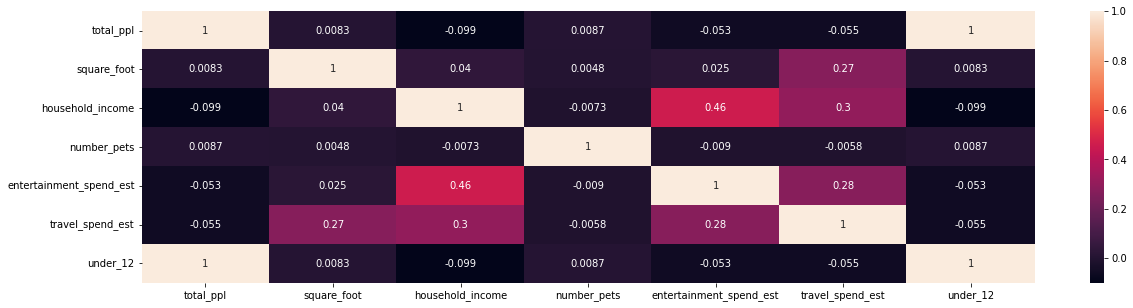

In [63]:
plt.figure(figsize = (20,5))
sns.heatmap(greater_boston.corr(), annot=True);

*Dropping the "under_12" variable from the dataset because it is postively and perfectly correlated with the "total_ppl" variable.* 

In [64]:
del greater_boston["under_12"]
#The correlation of 1 might affect the clustering model negatively. 

*Dropping the "region" variable because it is categorical and would make it difficult to build the clustering model successfully.* 

In [65]:
del greater_boston["own_rent"]
#Not numeric

del greater_boston["region"]
#Not numeric

del greater_boston["LL_passholder"]
#Not numeric

*Using the .head() function to check if the selected variables have been successfully dropped.*  

In [66]:
greater_boston.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
0,1.0,3309,82050.03,1,3189.11,3083.41
1,1.0,3814,83077.81,2,4175.35,4713.28
2,2.0,2592,91401.41,2,1814.98,3479.07
3,1.0,2628,73048.55,1,1945.14,3842.42
4,1.0,2442,89145.36,2,4410.86,1913.28


*Using the .corr() function to verify if the correlation between the remaining variables in the dataset would be viable for the buidling of the clustering model.*

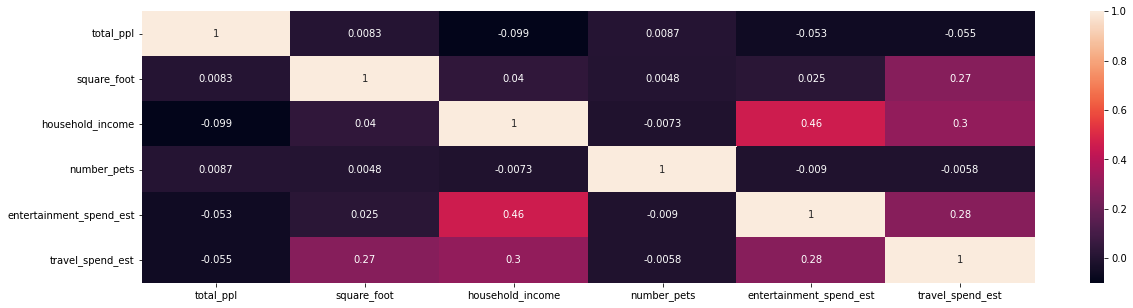

In [67]:
plt.figure(figsize = (20,5))
sns.heatmap(greater_boston.corr(), annot=True);

*Using median to impute the missing values in the "total_ppl" variable so that the clustering model can be built successfully. *

In [68]:
missing_col = ['total_ppl']
 
#Technique 2: Using median to impute the missing values
for i in missing_col:
 greater_boston.loc[greater_boston.loc[:,i].isnull(),i]=greater_boston.loc[:,i].median()
 
print("count of NULL values after imputation\n")
greater_boston.isnull().sum()

count of NULL values after imputation



total_ppl                  0
square_foot                0
household_income           0
number_pets                0
entertainment_spend_est    0
travel_spend_est           0
dtype: int64

CLUSTERING USING K-MEANS CLUSTERING 

*Implementing standardization by converting the values in the dataset into zscores and storing the normalized data in a new dataframe.* 

In [69]:
zscore = preprocessing.StandardScaler()
wr_standard = zscore.fit_transform(greater_boston)
wr_standard = pd.DataFrame(wr_standard)
wr_standard.columns=greater_boston.columns
wr_standard.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
0,-0.716147,0.232960,-0.101328,-0.644446,-0.213698,-1.154944
1,-0.716147,0.851909,-0.061423,0.621159,0.588799,1.033877
2,0.512938,-0.645826,0.261753,0.621159,-1.331818,-0.623595
3,-0.716147,-0.601703,-0.450824,-0.644446,-1.225907,-0.135637
4,-0.716147,-0.829672,0.174158,0.621159,0.780432,-2.726360


*Buidling an elbow chat to gain insights of how to build the clustering model properly.* 

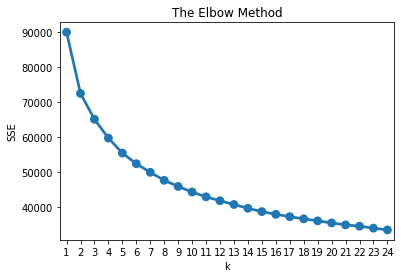

In [70]:
sse = { }
for k in range(1, 25): 
  # Initialize KMeans with k clusters
 kmeans = KMeans(n_clusters=k, random_state=654)
# Fit KMeans on the normalized dataset
 kmeans.fit(wr_standard)
 sse[k] = kmeans.inertia_
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')
# Add X-axis label "k"
plt.xlabel('k')
# Add Y-axis label "SSE"
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

*Using 5 from the Elbow Chart to build the k-means clustering model.* 

In [71]:
kmeans = KMeans(n_clusters=5, random_state=654)
kmeans.fit(wr_standard)
cluster_labels = kmeans.labels_

*Generating and showing summary statistics about each cluster. *

In [72]:
kmeans2 = wr_standard.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean'
}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,0.56,0.04,1.01,-0.01,1.15,0.55
1,-1.16,-0.40,0.49,-0.04,0.34,0.15
2,-0.02,1.19,-0.14,0.00,-0.23,0.68
3,0.33,-0.43,-0.68,-0.93,-0.60,-0.67
4,0.34,-0.38,-0.64,0.94,-0.60,-0.67


*Viewing the cluster assigment per row in the dataset. *

In [73]:
kmeans2['Cluster'] = kmeans2['Cluster'].astype('category')
kmeans2

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,Cluster
0,-0.716147,0.232960,-0.101328,-0.644446,-0.213698,-1.154944,3
1,-0.716147,0.851909,-0.061423,0.621159,0.588799,1.033877,2
2,0.512938,-0.645826,0.261753,0.621159,-1.331818,-0.623595,4
3,-0.716147,-0.601703,-0.450824,-0.644446,-1.225907,-0.135637,3
4,-0.716147,-0.829672,0.174158,0.621159,0.780432,-2.726360,4
...,...,...,...,...,...,...,...
14995,0.512938,-0.388441,-0.380519,-0.644446,-0.466227,-0.540051,3
14996,1.742024,-1.486617,-0.061191,-0.644446,-0.695982,-0.654241,3
14997,0.512938,0.479314,0.980832,-0.644446,1.126927,-0.229616,0
14998,1.742024,-0.691175,-1.448652,-0.644446,-1.873818,0.303397,3


**VISUALIZATIONS BY CLUSTER** 

This visualization indicates that individuals from Clusters 0 and 1 have the highest estimated annual household income in comparison to individuals from the other Clusters.  

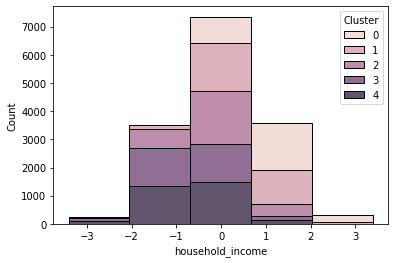

In [34]:
sns.histplot(data=kmeans2, x="household_income", hue="Cluster", multiple="stack",bins=5)

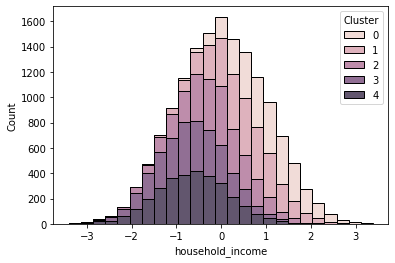

In [35]:
sns.histplot(data=kmeans2, x="household_income", hue="Cluster", multiple="stack",bins=25)

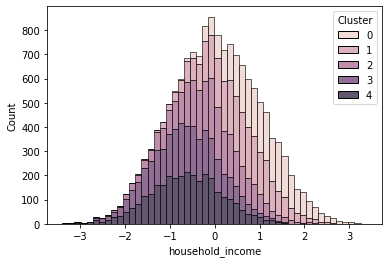

In [36]:
sns.histplot(data=kmeans2, x="household_income", hue="Cluster", multiple="stack",bins=50)

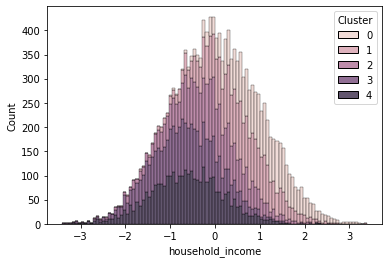

In [37]:
sns.histplot(data=kmeans2, x="household_income", hue="Cluster", multiple="stack",bins=100)

 This visualization indicates that individuals from Cluster 2 have the highest estimated annual expenditure on travel followed by individuals from Cluster 0 and 1

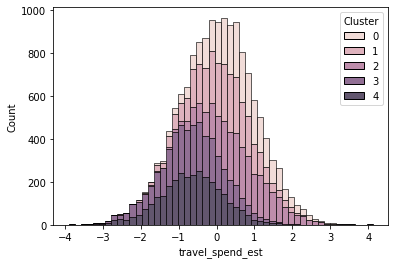

In [45]:
sns.histplot(data=kmeans2, x="travel_spend_est", hue="Cluster", multiple="stack",bins=50)

 This visualization indicates that individuals from Cluster 0 and Cluster 1 have the highest estimated annual expenditure on entertainment. Individuals from Clusters 2, 3 and 4 are not that enthusiastic. 

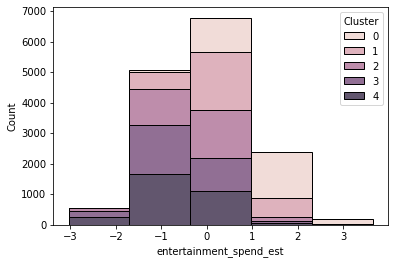

In [41]:
sns.histplot(data=kmeans2, x="entertainment_spend_est", hue="Cluster", multiple="stack",bins=5)

This visualization indicates that individuals from Cluster 4 have the most number of pets. 

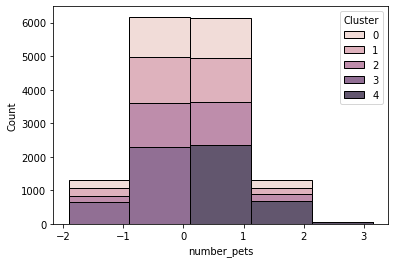

In [47]:
sns.histplot(data=kmeans2, x="number_pets", hue="Cluster", multiple="stack" ,bins=5)

#sns.barplot(x='total_ppl', y='square_foot', data=kmeans2);

NAME OF CLUSTERS AND EXPLANATION OF THE NAMES 


---


CLUSTER 0 - Cluster Super Rich, Super Entertainment Seekers and High Expedition Seekers.  

This is because the cluster has the highest scores for household_income and entertainment_spend_est. Also the second best score for travel_spend_est.   



CLUSTER 1 - Cluster Rich, Entertainment Seekers and Low Expedition Seekers.

This is because the cluster has good scores for household_income, entertainment_spend_est and travel_spend_est.



CLUSTER 2 -  Cluster Highest Expedition Seekers
This is because the cluster has the highest score for travel_spend_est.



CLUSTER 3 - Cluster Seniors  
This because the cluster has poor scores for household_income, entertainment_spend_est and travel_spend_est.



CLUSTER 4 - Cluster Seniors 
This is because the cluster has similar values with CLUSTER 3. 


---





RECOMMENDATION TO PARK MANAGEMENT ON HOW TO REACH EACH SEGMENT. 



CLUSTER SUPER RICH, SUPER ENTERTAINMENT SEEKERS AND HIGH EXPEDITION SEEKERS
Given the individuals in this cluster are super rich, super entertainment seekers and high expedition seekers, Park management could target the individuals in this cluster by informing them of the very best on offer at Lobster Land. The offer could range from Luxury accomodation, exotic cars for transport, top notch dining and world class entertainment. 

CLUSTER RICH, ENTERTAINMENT SEEKERS AND LOW EXPEDITION SEEKERS
Given the individuals in this cluster are rich, entertainment seekers and low expedition seekers, Park management could target the individuals in this cluster by offering holiday packages that seem to cover the cost of travel to Lobster Land and offer discounts on entertainment shows. Revenue from luxury accomodation and exotic transportation at lobster land by these individuals might just balance the books. 

CLUSTER HIGHEST EXPEDITION SEEKERS
Given that the individuals from this cluster are the Highest Expedition Seekers, Park Management can target them by offering packages with discounts on accomodation and entertainment at Lobster Land. Then make it seem as though all they would have to pay a full amount on is the cost of their journey to Lobster Land which they would not mind paying for given the result of the clustering model. 

CLUSTER SENIORS 
The individuals in this cluster which is an aggregation of Clusters 3 & 4 are seniors. They might not be too keen on visiting Lobster Land hence they would not need to be specifically targeted because spending on targeted marketing for this cluster might not yield good returns.  



In [42]:
kmeans2 = wr_standard.assign(Cluster = cluster_labels)
kmeans2.groupby(['Cluster']).agg({
'total_ppl': 'mean',
'square_foot': 'mean',
'household_income': 'mean',
'number_pets': 'mean',
'entertainment_spend_est': 'mean',
'travel_spend_est': 'mean'
}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,0.56,0.04,1.01,-0.01,1.15,0.55
1,-1.16,-0.40,0.49,-0.04,0.34,0.15
2,-0.02,1.19,-0.14,0.00,-0.23,0.68
3,0.33,-0.43,-0.68,-0.93,-0.60,-0.67
4,0.34,-0.38,-0.64,0.94,-0.60,-0.67
